In [ ]:
import os
import pandas as pd

print("=" * 70)
print("GENERATING MANIFEST.CSV")
print("=" * 70)

# Data path
base_path = r'C:\Users\hrodo\Downloads\WUT-IML-2025-2026-main\WUT-IML-2025-2026-main\data_recordings'

print(f"\n📂 Base path: {base_path}")

rows = []

print("\n🔵 Processing ACCEPTED...")
accepted_folder = os.path.join(base_path, 'accepted')
if os.path.exists(accepted_folder):
    for speaker_folder in os.listdir(accepted_folder):
        speaker_path = os.path.join(accepted_folder, speaker_folder)
        if os.path.isdir(speaker_path):
            file_count = 0
            for file in os.listdir(speaker_path):
                if file.endswith(('.wav', '.mp3', '.flac')):
                    relative_path = os.path.join('accepted', speaker_folder, file)
                    rows.append({
                        'speaker_id': speaker_folder,
                        'path': relative_path,
                        'label': 1  # 1 = ACCEPTED
                    })
                    file_count += 1
            print(f"  ✓ {speaker_folder}: {file_count} archivos")
else:
    print(f"  ⚠️  Not found: {accepted_folder}")

print("\n🔴 Processing REJECTED...")
rejected_folder = os.path.join(base_path, 'rejected')
if os.path.exists(rejected_folder):
    for speaker_folder in os.listdir(rejected_folder):
        speaker_path = os.path.join(rejected_folder, speaker_folder)
        if os.path.isdir(speaker_path):
            file_count = 0
            for file in os.listdir(speaker_path):
                if file.endswith(('.wav', '.mp3', '.flac')):
                    relative_path = os.path.join('rejected', speaker_folder, file)
                    rows.append({
                        'speaker_id': speaker_folder,
                        'path': relative_path,
                        'label': 0  # 0 = REJECTED
                    })
                    file_count += 1
            print(f"  ✓ {speaker_folder}: {file_count} archivos")
else:
    print(f"  ⚠️  Not found: {rejected_folder}")

df = pd.DataFrame(rows)
manifest_file = os.path.join(base_path, 'manifest.csv')
df.to_csv(manifest_file, index=False)

print("\n" + "=" * 70)
print("✅ MANIFEST GENERAED SUCCESFULLY")
print("=" * 70)
print(f"\n📄 Archive: {manifest_file}")
print(f"📊 Total archives: {len(df)}")
print(f"  • Accepted (label=1): {sum(df['label'] == 1)}")
print(f"  • Rejected (label=0): {sum(df['label'] == 0)}")
print(f"\n🔍 First 5 rows:")
print(df.head())
print(f"\n🔍 Columns: {df.columns.tolist()}")


GENERATING MANIFEST.CSV

📂 Base path: C:\Users\hrodo\Downloads\WUT-IML-2025-2026-main\WUT-IML-2025-2026-main\data_recordings

🔵 Processing ACCEPTED...
  ✓ p001: 242 archivos
  ✓ p226: 276 archivos
  ✓ p227: 303 archivos
  ✓ p228: 274 archivos
  ✓ p230: 287 archivos
  ✓ p233: 296 archivos

🔴 Processing REJECTED...
  ✓ p231: 107 archivos
  ✓ p232: 96 archivos
  ✓ p236: 102 archivos
  ✓ p239: 99 archivos
  ✓ p243: 82 archivos
  ✓ p244: 97 archivos
  ✓ p250: 103 archivos
  ✓ p254: 90 archivos
  ✓ p256: 86 archivos
  ✓ p257: 103 archivos
  ✓ p258: 92 archivos
  ✓ p259: 91 archivos
  ✓ p267: 98 archivos
  ✓ p268: 92 archivos
  ✓ p269: 90 archivos
  ✓ p270: 86 archivos
  ✓ p273: 94 archivos
  ✓ p274: 91 archivos
  ✓ p276: 88 archivos
  ✓ p277: 89 archivos

✅ MANIFEST GENERAED SUCCESFULLY

📄 Archive: C:\Users\hrodo\Downloads\WUT-IML-2025-2026-main\WUT-IML-2025-2026-main\data_recordings\manifest.csv
📊 Total archives: 3554
  • Accepted (label=1): 1678
  • Rejected (label=0): 1876

🔍 First 5 rows

SPEAKER VERIFICATION - CNN WITH MEL-SPECTROGRAMS

Configuration:
  Base path: C:\Users\hrodo\Downloads\WUT-IML-2025-2026-main\WUT-IML-2025-2026-main\data_recordings
  Manifest: C:\Users\hrodo\Downloads\WUT-IML-2025-2026-main\WUT-IML-2025-2026-main\data_recordings\manifest.csv
  Max samples: All

VERIFYING FILES AND PATHS
Base folder found
Manifest found

STEP 1: LOADING DATA FROM MANIFEST.CSV

Total entries: 3554

First 5 rows:
  speaker_id                        path  label
0       p001  accepted\p001\p001_001.wav      1
1       p001  accepted\p001\p001_002.wav      1
2       p001  accepted\p001\p001_003.wav      1
3       p001  accepted\p001\p001_004.wav      1
4       p001  accepted\p001\p001_005.wav      1

Class distribution:
  Accepted: 1678
  Rejected: 1876

STEP 2: LOADING AUDIO FILES
  Processed 50/3554 files...
  Processed 100/3554 files...
  Processed 150/3554 files...
  Processed 200/3554 files...
  Processed 250/3554 files...
  Processed 300/3554 files...
  Processed 350/3

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 128, 130, 1)    │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 130, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 65, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 65, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 65, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,287,236 (16.35 MB)

 Trainable params: 4,287,233 (16.35 MB)

 Non-trainable params: 3 (16.00 B)

Epoch 1/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 31s 167ms/step - accuracy: 0.5747 - loss: 0.7074 - val_accuracy: 0.6076 - val_loss: 0.6610
Epoch 2/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 32s 181ms/step - accuracy: 0.6908 - loss: 0.5770 - val_accuracy: 0.6582 - val_loss: 0.5301
Epoch 3/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 31s 173ms/step - accuracy: 0.8104 - loss: 0.4109 - val_accuracy: 0.8340 - val_loss: 0.3649
Epoch 4/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 30s 171ms/step - accuracy: 0.8755 - loss: 0.2988 - val_accuracy: 0.8790 - val_loss: 0.2867
Epoch 5/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 31s 173ms/step - accuracy: 0.8983 - loss: 0.2540 - val_accuracy: 0.9015 - val_loss: 0.2357
Epoch 6/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 30s 169ms/step - accuracy: 0.9212 - loss: 0.1973 - val_accuracy: 0.9212 - val_loss: 0.1995
Epoch 7/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 30s 169ms/step - accuracy: 0.9209 - loss: 0.1810 - val_accuracy: 0.9297 - val_loss: 0.1794
Epoch 8/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 30s 169ms/step - accuracy: 0.9441 - loss: 0

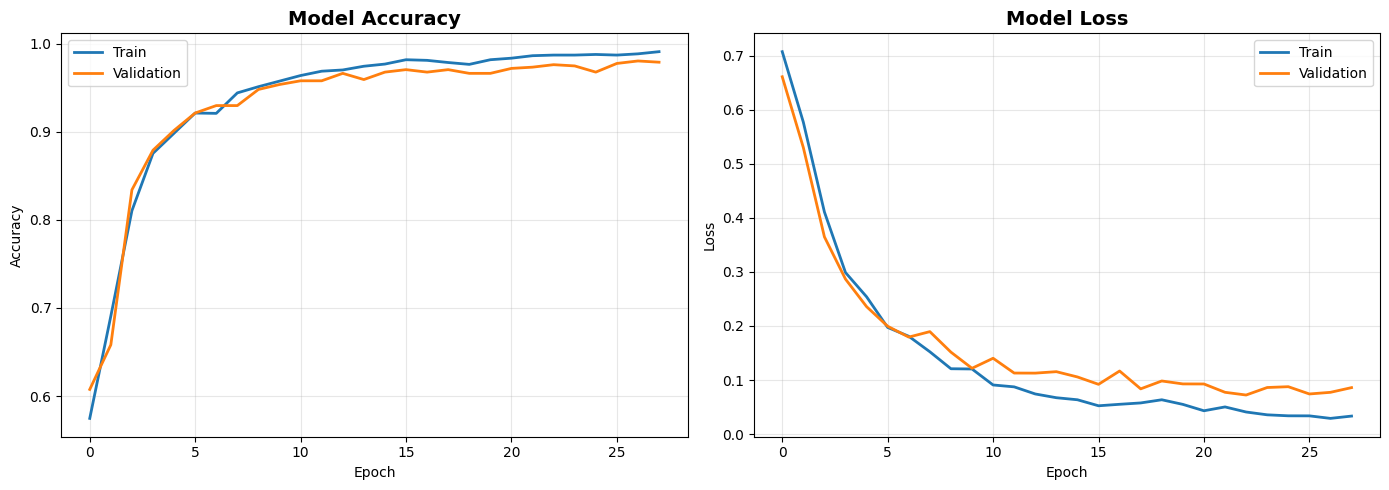

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step

VALIDATION ACCURACY: 97.61%

              precision    recall  f1-score   support

    Rejected       0.97      0.99      0.98       375
    Accepted       0.98      0.96      0.97       336

    accuracy                           0.98       711
   macro avg       0.98      0.98      0.98       711
weighted avg       0.98      0.98      0.98       711



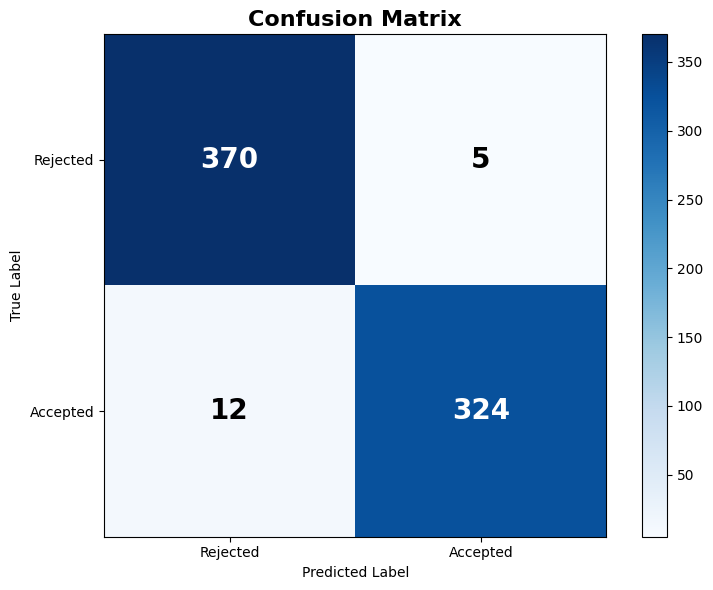


TRAINING COMPLETED SUCCESSFULLY!

Generated files:
  • training_history.png
  • confusion_matrix.png
  • validation_results.csv
  • speaker_verification_model.h5


In [8]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os
import warnings
warnings.filterwarnings('ignore')

print("=" * 70)
print("SPEAKER VERIFICATION - CNN WITH MEL-SPECTROGRAMS")
print("=" * 70)

base_path = r'C:\Users\hrodo\Downloads\WUT-IML-2025-2026-main\WUT-IML-2025-2026-main\data_recordings'
manifest_path = os.path.join(base_path, 'manifest.csv')
MAX_SAMPLES = None

print(f"\nConfiguration:")
print(f"  Base path: {base_path}")
print(f"  Manifest: {manifest_path}")
print(f"  Max samples: {MAX_SAMPLES if MAX_SAMPLES else 'All'}")

print("\n" + "=" * 70)
print("VERIFYING FILES AND PATHS")
print("=" * 70)

if not os.path.exists(base_path):
    raise FileNotFoundError(f"Base folder not found: {base_path}")

if not os.path.exists(manifest_path):
    print("\nPlease run first: python run_pipeline_to_get_data.py")
    raise FileNotFoundError("manifest.csv not found")

print("Base folder found")
print("Manifest found")

print("\n" + "=" * 70)
print("STEP 1: LOADING DATA FROM MANIFEST.CSV")
print("=" * 70)

df = pd.read_csv(manifest_path)
print(f"\nTotal entries: {len(df)}")

if MAX_SAMPLES:
    df = df.head(MAX_SAMPLES)

print(f"\nFirst 5 rows:")
print(df.head())

if 'path' not in df.columns or 'label' not in df.columns:
    raise ValueError("Incorrect manifest format")

print(f"\nClass distribution:")
print(f"  Accepted: {sum(df['label'] == 1)}")
print(f"  Rejected: {sum(df['label'] == 0)}")

def load_audio_file(file_path, base_folder, sr=22050, max_duration=3):
    full_path = os.path.join(base_folder, file_path)
    try:
        y, _ = librosa.load(full_path, sr=sr, duration=max_duration)
        y = y / (np.max(np.abs(y)) + 1e-6)
        y, _ = librosa.effects.trim(y, top_db=20)
        
        target_length = sr * max_duration
        if len(y) < target_length:
            y = np.pad(y, (0, target_length - len(y)))
        else:
            y = y[:target_length]
        return y
    except:
        return None

print("\n" + "=" * 70)
print("STEP 2: LOADING AUDIO FILES")
print("=" * 70)

audio_data = []
labels = []
failed = 0

for idx, row in df.iterrows():
    audio = load_audio_file(row['path'], base_path)
    if audio is not None:
        audio_data.append(audio)
        labels.append(row['label'])
    else:
        failed += 1
    
    if (idx + 1) % 50 == 0:
        print(f"  Processed {idx + 1}/{len(df)} files...")

print(f"\nLoading completed: {len(audio_data)} files")
if failed > 0:
    print(f"Failed: {failed}")

if len(audio_data) == 0:
    raise ValueError("No data to train")

print("\n" + "=" * 70)
print("STEP 3: GENERATING MEL-SPECTROGRAMS")
print("=" * 70)

def audio_to_spectrogram(y, sr=22050, n_mels=128):
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, fmax=8000)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db[..., np.newaxis]

spectrograms = []
for i, audio in enumerate(audio_data):
    spectrograms.append(audio_to_spectrogram(audio))
    if (i + 1) % 50 == 0:
        print(f"  Processed {i + 1}/{len(audio_data)} spectrograms...")

spectrograms = np.array(spectrograms)
labels = np.array(labels)

print(f"\nSpectrograms shape: {spectrograms.shape}")

X_train, X_val, y_train, y_val = train_test_split(
    spectrograms, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"\nTrain: {X_train.shape[0]} | Validation: {X_val.shape[0]}")

print("\n" + "=" * 70)
print("STEP 4: BUILDING AND TRAINING CNN")
print("=" * 70)

norm_layer = layers.Normalization()
norm_layer.adapt(X_train)

def build_cnn_model(input_shape, norm):
    return models.Sequential([
        layers.Input(shape=input_shape),
        norm,
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

model = build_cnn_model(X_train.shape[1:], norm_layer)
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

print("\n" + "=" * 70)
print("STEP 5: EVALUATION AND RESULTS")
print("=" * 70)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(history.history['accuracy'], label='Train', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Model Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Train', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Model Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=150, bbox_inches='tight')
plt.show()

y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

accuracy = accuracy_score(y_val, y_pred)
print(f"\nVALIDATION ACCURACY: {accuracy*100:.2f}%\n")
print(classification_report(y_val, y_pred, target_names=['Rejected', 'Accepted']))

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.colorbar()

classes = ['Rejected', 'Accepted']
plt.xticks([0, 1], classes)
plt.yticks([0, 1], classes)

thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black",
                fontsize=20, fontweight='bold')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

results_df = pd.DataFrame({
    'true_label': y_val,
    'predicted_label': y_pred,
    'confidence': y_pred_prob.flatten()
})
results_df.to_csv('validation_results.csv', index=False)

model.save('speaker_verification_model.h5')

print("\n" + "=" * 70)
print("TRAINING COMPLETED SUCCESSFULLY!")
print("=" * 70)
print("\nGenerated files:")
print("  • training_history.png")
print("  • confusion_matrix.png")
print("  • validation_results.csv")
print("  • speaker_verification_model.h5")

